In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## Modelling with imbalance target class

### Feature Engineering Non Numeric Features

In [8]:
target = df['Outcome']
features = df.drop('Outcome',axis=1)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report

In [12]:
def class_report_by_algo(x,y,model):
    X_train,X_test,y_train,y_test = train_test_split(x,y)
    clf = model()
    clf.fit(X_train,y_train)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_train)
    print('Class Report Data Test')
    print(classification_report(y_test,prediction_test))
    print('====================')
    print('Class Report Data Train')
    print(classification_report(y_train,prediction_train))

In [13]:
class_report_by_algo(features,target,LogisticRegression)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       116
           1       0.80      0.43      0.56        76

    accuracy                           0.73       192
   macro avg       0.76      0.68      0.69       192
weighted avg       0.75      0.73      0.71       192

Class Report Data Train
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       384
           1       0.75      0.55      0.64       192

    accuracy                           0.79       576
   macro avg       0.78      0.73      0.74       576
weighted avg       0.79      0.79      0.78       576



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
class_report_by_algo(features,target,DecisionTreeClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       120
           1       0.67      0.56      0.61        72

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.72      0.73      0.72       192

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       196

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [15]:
class_report_by_algo(features,target,RandomForestClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       126
           1       0.69      0.53      0.60        66

    accuracy                           0.76       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192

Class Report Data Train
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       374
           1       0.99      0.96      0.97       202

    accuracy                           0.98       576
   macro avg       0.99      0.98      0.98       576
weighted avg       0.98      0.98      0.98       576



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
class_report_by_algo(features,target,GradientBoostingClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       118
           1       0.75      0.53      0.62        74

    accuracy                           0.75       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.75      0.75      0.74       192

Class Report Data Train
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       382
           1       0.94      0.84      0.89       194

    accuracy                           0.93       576
   macro avg       0.93      0.90      0.92       576
weighted avg       0.93      0.93      0.93       576



## Random oversampling

In [18]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [20]:
ros = RandomOverSampler()
X_ros , y_ros = ros.fit_sample(features,target)

In [21]:
df_over_all = pd.DataFrame(X_ros,columns=features.columns)
df_over_all['Outcome'] = y_ros

In [23]:
df_over_all['Outcome'].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

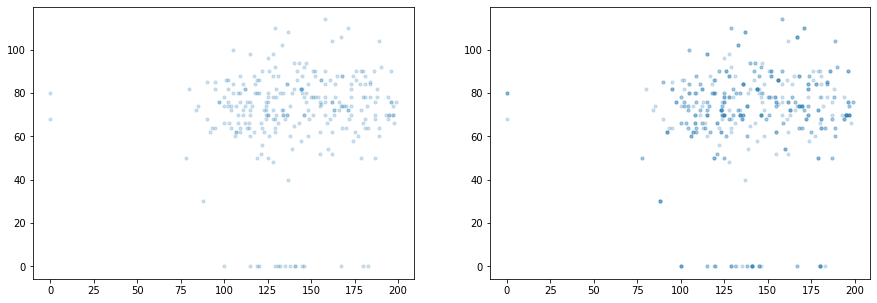

In [24]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].scatter(df[df['Outcome'] == 1]['Glucose'] ,
              df[df['Outcome'] == 1]['BloodPressure'] ,s=10 , alpha=0.2)
ax[1].scatter(df_over_all[df_over_all['Outcome'] == 1]['Glucose'] ,
              df_over_all[df_over_all['Outcome'] == 1]['BloodPressure'] ,s=10 , alpha=0.2)

In [25]:
class_report_by_algo(df_over_all.drop('Outcome',axis=1) , df_over_all['Outcome'] , LogisticRegression)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       117
           1       0.74      0.75      0.75       133

    accuracy                           0.73       250
   macro avg       0.73      0.73      0.73       250
weighted avg       0.73      0.73      0.73       250

Class Report Data Train
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       383
           1       0.77      0.75      0.76       367

    accuracy                           0.77       750
   macro avg       0.77      0.77      0.77       750
weighted avg       0.77      0.77      0.77       750



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
class_report_by_algo(df_over_all.drop('Outcome',axis=1) , 
                     df_over_all['Outcome'] , DecisionTreeClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       119
           1       0.80      0.85      0.83       131

    accuracy                           0.81       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.81      0.81      0.81       250

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      1.00      1.00       369

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [28]:
class_report_by_algo(X_ros,y_ros,RandomForestClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       120
           1       0.84      0.86      0.85       130

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250

Class Report Data Train
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       380
           1       1.00      0.98      0.99       370

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
class_report_by_algo(X_ros,y_ros,GradientBoostingClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.87      0.76      0.82       127
           1       0.78      0.89      0.83       123

    accuracy                           0.82       250
   macro avg       0.83      0.82      0.82       250
weighted avg       0.83      0.82      0.82       250

Class Report Data Train
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       373
           1       0.91      0.95      0.93       377

    accuracy                           0.93       750
   macro avg       0.93      0.93      0.93       750
weighted avg       0.93      0.93      0.93       750



In [31]:
def class_report_by_algo_oversampling(x,y,model):
    X_train,X_test,y_train,y_test = train_test_split(x,y)
    clf = model()
    ros = RandomOverSampler(random_state=101)
    X_ros, y_ros = ros.fit_sample(X_train,y_train)
    
    clf.fit(X_ros,y_ros)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_ros)
    print('Class Report Data Test')
    print(classification_report(y_test,prediction_test))
    print('====================')
    print('Class Report Data Train')
    print(classification_report(y_ros,prediction_train))

In [33]:
class_report_by_algo_oversampling(features,target,DecisionTreeClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.80      0.70      0.74       125
           1       0.54      0.67      0.60        67

    accuracy                           0.69       192
   macro avg       0.67      0.68      0.67       192
weighted avg       0.71      0.69      0.69       192

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       375

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [34]:
class_report_by_algo_oversampling(features,target,GradientBoostingClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       111
           1       0.71      0.80      0.76        81

    accuracy                           0.78       192
   macro avg       0.78      0.78      0.78       192
weighted avg       0.79      0.78      0.78       192

Class Report Data Train
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       389
           1       0.91      0.96      0.93       389

    accuracy                           0.93       778
   macro avg       0.93      0.93      0.93       778
weighted avg       0.93      0.93      0.93       778



## SMOTE
#### Syntentic Minority Over Sampling

In [35]:
sm = SMOTE(random_state=101)
X_sm, y_sm = sm.fit_sample(features,target)
df_smote_all = pd.DataFrame(X_sm,columns=features.columns)
df_smote_all['Outcome'] = y_sm

In [36]:
df_smote_all['Outcome'].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

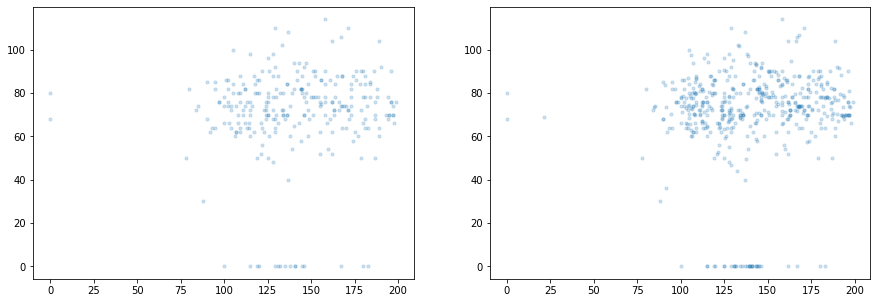

In [37]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].scatter(df[df['Outcome'] == 1]['Glucose'] ,
              df[df['Outcome'] == 1]['BloodPressure'] ,s=10 , alpha=0.2)
ax[1].scatter(df_smote_all[df_smote_all['Outcome'] == 1]['Glucose'] ,
              df_smote_all[df_smote_all['Outcome'] == 1]['BloodPressure'],s=10 , alpha=0.2)

In [40]:
def class_report_by_algo_smote(x,y,model):
    X_train,X_test,y_train,y_test = train_test_split(x,y)
    clf = model()
    ros = SMOTE(random_state=101)
    X_ros, y_ros = ros.fit_sample(X_train,y_train)
    
    clf.fit(X_ros,y_ros)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_ros)
    print('Class Report Data Test')
    print(classification_report(y_test,prediction_test))
    print('====================')
    print('Class Report Data Train')
    print(classification_report(y_ros,prediction_train))
    


In [41]:
class_report_by_algo_smote(features,target,DecisionTreeClassifier)

Class Report Data Test
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       119
           1       0.53      0.56      0.55        73

    accuracy                           0.65       192
   macro avg       0.63      0.63      0.63       192
weighted avg       0.65      0.65      0.65       192

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      1.00      1.00       381

    accuracy                           1.00       762
   macro avg       1.00      1.00      1.00       762
weighted avg       1.00      1.00      1.00       762

